In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import norm

In [2]:
scriptName = 'Assoc.v11-WGM_.01_.05_.1'

In [3]:
txtFilesPath = "./txt files/"
fileList = os.listdir(txtFilesPath)
len(fileList)

24

In [4]:
lenOfProteins_Df = pd.read_csv('proteinLength.txt', sep='\t', header=None)
lenOfProteins_Df

,0,1
0,"3C-like proteinase, Coronavirus",306
1,BCAR3,638
2,BRAF,83
3,ERVW-1,75
4,HFM1,601
5,KRAS,275
6,Membrane Protein,222
7,NRAS,61
8,"NSP6 protein, rotavirus group A",290
9,"nsp9 protein, SARS virus",113


In [5]:
lenAllProteins = sum(lenOfProteins_Df[1])
lenAllProteins

10026

In [6]:
All_Df = pd.DataFrame()

for file in os.listdir(txtFilesPath):
    print(file)
    df = pd.read_csv(txtFilesPath+file, sep='\t')

    df['proteinLength'] = lenOfProteins_Df[lenOfProteins_Df[0]==df['Selection'][0]][1].values[0]
    All_Df = All_Df.append(df)

All_Df

3C-like proteinase, Coronavirus.txt
BCAR3.txt
BRAF.txt
ERVW-1.txt
HFM1.txt
KRAS.txt
Membrane Glycoproteins.txt
membrane protein.txt
NRAS.txt
Nsp10 protein, SARS virus.txt
nsp6.txt
nsp9 protein, SARS virus.txt
Nucleocapsid Protein.txt
ORF 10 protein, varicella-zoster virus.txt
ORF3A protein, SARS coronavirus.txt
ORF7b protein, SARS coronavirus.txt
protein 6, SARS virus.txt
PRSS57.txt
Reverse Transcriptase.txt
RIT1.txt
sars7a protein, SARS virus.txt
SH2D3C.txt
Spike Glycoprotein, Coronavirus.txt
Structural Protein.txt


,Selection,Association Name,Association Type,Significance,proteinLength
0,"3C-like proteinase, Coronavirus",Rebirthing,Procedure,0.00102,306
1,"3C-like proteinase, Coronavirus",Sequence alignment,Procedure,0.00246,306
2,"3C-like proteinase, Coronavirus",Mutagenesis,Procedure,0.00360,306
3,"3C-like proteinase, Coronavirus",Analytical ultracentrifugation,Procedure,0.00553,306
4,"3C-like proteinase, Coronavirus",Drug discovery,Procedure,0.00568,306
...,...,...,...,...,...
14992,Structural Protein,ren shen,Traditional chinese medicine,1.00000,222
14993,Structural Protein,shui zhi,Traditional chinese medicine,1.00000,222
14994,Structural Protein,fu xiao mai,Traditional chinese medicine,1.00000,222
14995,Structural Protein,ren shen hua,Traditional chinese medicine,1.00000,222


In [7]:

if (len(os.listdir(txtFilesPath))!=len(lenOfProteins_Df)):
    print('WARNING: number of proteins are ', len(os.listdir(txtFilesPath)))
    print('    while proteinLength.txt has ', len(lenOfProteins_Df), ' proteins')
    import warnings
    warnings.warn("Warning...........Message")    


In [8]:
cols = All_Df.columns.tolist()
cols = [cols[0], cols[-1]]+ cols[1:-1]
All_Df=All_Df[cols]

In [9]:
All_Df = All_Df.rename(columns={'Selection':'Protein'})
All_Df = All_Df.rename(columns={'Association Name':'AssociationName'})
All_Df = All_Df.rename(columns={'Association Type':'AssociationType'})

All_Df.to_csv(scriptName+'-All.txt', sep='\t', index=None)
All_Df


,Protein,proteinLength,AssociationName,AssociationType,Significance
0,"3C-like proteinase, Coronavirus",306,Rebirthing,Procedure,0.00102
1,"3C-like proteinase, Coronavirus",306,Sequence alignment,Procedure,0.00246
2,"3C-like proteinase, Coronavirus",306,Mutagenesis,Procedure,0.00360
3,"3C-like proteinase, Coronavirus",306,Analytical ultracentrifugation,Procedure,0.00553
4,"3C-like proteinase, Coronavirus",306,Drug discovery,Procedure,0.00568
...,...,...,...,...,...
14992,Structural Protein,222,ren shen,Traditional chinese medicine,1.00000
14993,Structural Protein,222,shui zhi,Traditional chinese medicine,1.00000
14994,Structural Protein,222,fu xiao mai,Traditional chinese medicine,1.00000
14995,Structural Protein,222,ren shen hua,Traditional chinese medicine,1.00000


In [10]:
'''
pdfName = scriptName+'-separatePRT.pdf'
pdf = PdfPages(pdfName)

print('Proteins:')
for Protein in All_Df.Protein.unique():#[1:3]:
    print('-',Protein)
    for Type in All_Df.AssociationType.unique():#[1:3]:
#         print(Type)
        proteinType_Df = All_Df[(All_Df["Protein"]==Protein) & (All_Df["AssociationType"]==Type) ]
        proteinType_Df = proteinType_Df.sort_values(by=['Significance'], ascending= True)
        proteinType_Df = proteinType_Df[proteinType_Df['Significance']<1e-3][:20]
#         print(proteinType_Df)
        if (len(proteinType_Df)==0):
            continue
        
    
        fig = plt.figure(figsize=(11,8.5))
        ax = sns.boxplot(x="AssociationName", 
                     y="Significance", 
                     data= proteinType_Df,
#                      order = search_values#AssocType_Tops['AssociationName'].value_counts().index
                    )
        ax.set_xticklabels(#AssocName["AssociationName"] + " ("+ AssocName["#of proteins"].astype(str)+")",
                       ax.get_xticklabels(), 
                       horizontalalignment='right',
                       rotation=20)

        ax.set_title('Protein: '+ Protein)
        ax.set_xlabel(Type)
        pdf.savefig(ax.figure, bbox_inches='tight')
        plt.close(fig)

        
        
pdf.close()
print('\n*****   saved to:', pdfName, '   *****')    
'''

'\npdfName = scriptName+\'-separatePRT.pdf\'\npdf = PdfPages(pdfName)\n\nprint(\'Proteins:\')\nfor Protein in All_Df.Protein.unique():#[1:3]:\n    print(\'-\',Protein)\n    for Type in All_Df.AssociationType.unique():#[1:3]:\n#         print(Type)\n        proteinType_Df = All_Df[(All_Df["Protein"]==Protein) & (All_Df["AssociationType"]==Type) ]\n        proteinType_Df = proteinType_Df.sort_values(by=[\'Significance\'], ascending= True)\n        proteinType_Df = proteinType_Df[proteinType_Df[\'Significance\']<1e-3][:20]\n#         print(proteinType_Df)\n        if (len(proteinType_Df)==0):\n            continue\n        \n    \n        fig = plt.figure(figsize=(11,8.5))\n        ax = sns.boxplot(x="AssociationName", \n                     y="Significance", \n                     data= proteinType_Df,\n#                      order = search_values#AssocType_Tops[\'AssociationName\'].value_counts().index\n                    )\n        ax.set_xticklabels(#AssocName["AssociationName"] + " 

In [11]:
# pdf.close()

In [12]:
# NameType_Df = All_Df[All_Df['AssociationName']=='Pneumonia']
NameType_Df = All_Df[All_Df['AssociationName']=='Chloroquine']
# NameType_Df = NameType_Df.sort_values(by=['proteinLength'], ascending=[False, ])
NameType_Df = NameType_Df.sort_values(by=['Significance'], ascending=[True, ])

NameType_Df

,Protein,proteinLength,AssociationName,AssociationType,Significance
45777,Membrane Protein,222,Chloroquine,Drug,0.00141
26355,Membrane Glycoproteins,1273,Chloroquine,Drug,0.01160
8761,ERVW-1,75,Chloroquine,Drug,0.04470
8547,BRAF,83,Chloroquine,Drug,0.20700
20272,Reverse Transcriptase,932,Chloroquine,Drug,0.22400
10640,KRAS,275,Chloroquine,Drug,0.66400
8656,Structural Protein,222,Chloroquine,Drug,0.79600
4480,Nucleocapsid Protein,419,Chloroquine,Drug,0.97000
9860,HFM1,601,Chloroquine,Drug,1.00000
6437,NRAS,61,Chloroquine,Drug,1.00000


In [13]:
NameType_Df=NameType_Df[-3:-1]
NameType_Df

,Protein,proteinLength,AssociationName,AssociationType,Significance
9860,HFM1,601,Chloroquine,Drug,1.0
6437,NRAS,61,Chloroquine,Drug,1.0


In [14]:
w = NameType_Df['proteinLength']   # weights: protein lengths
Sig = NameType_Df['Significance']
wS = np.sum(w*np.log(Sig))   # weighted Geometric Sum
W = lenAllProteins   # length of All considered proteins in the Covid-19
p_value = np.exp(wS/W)   # final p_value
weightedSig = p_value   
weightedSig

1.0

In [15]:
l = NameType_Df.proteinLength
S = NameType_Df.Significance
sum(l*S)/sum(l)

1.0

In [16]:
All_Df.AssociationType.unique()

array(['Procedure', 'Disease', 'Chemical', 'Anatomy', 'Biomedical expert',
       'Food', 'Cellular component', 'Drug', 'Molecular function',
       'Symptom', 'Gene/Protein', 'Biological process', 'MeSH',
       'Traditional chinese medicine'], dtype=object)

Procedure :  21989
Disease :  16789
Chemical :  87557
Anatomy :  22482
Biomedical expert :  1992
Food :  1757
Cellular component :  3750
Drug :  10794
Molecular function :  2844
Symptom :  1744
Gene/Protein :  43863
Biological process :  10811
MeSH :  48841
Traditional chinese medicine :  1001


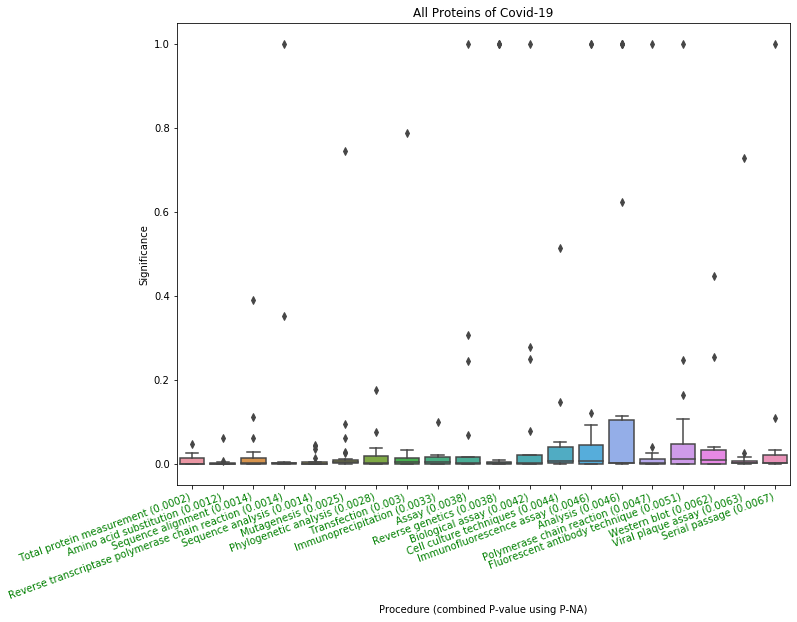

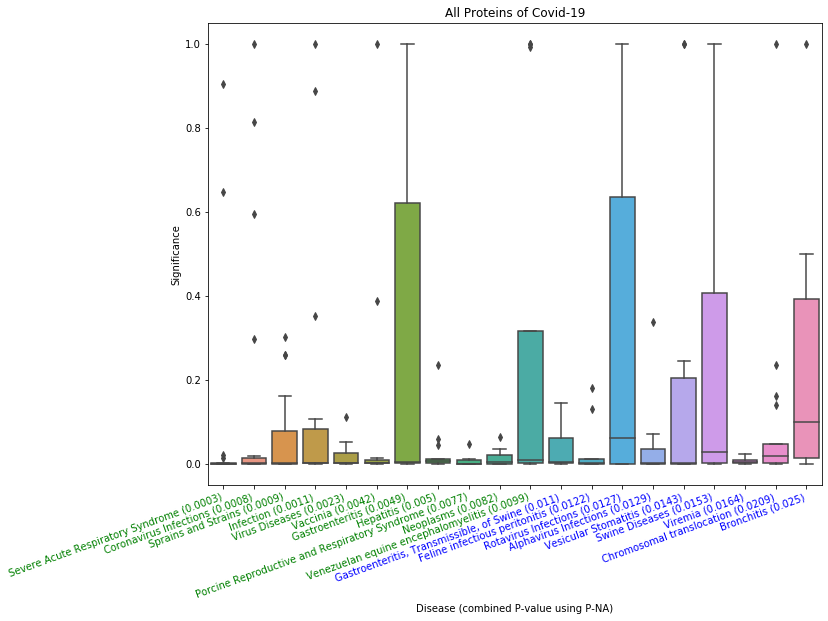

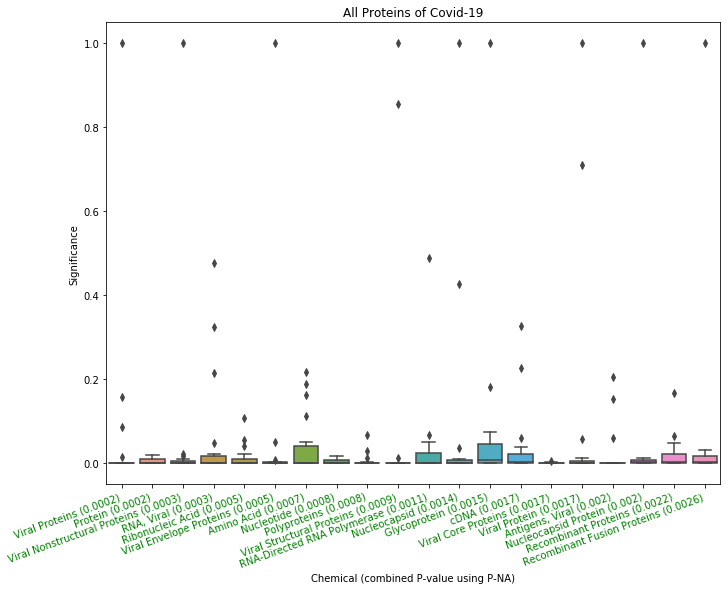

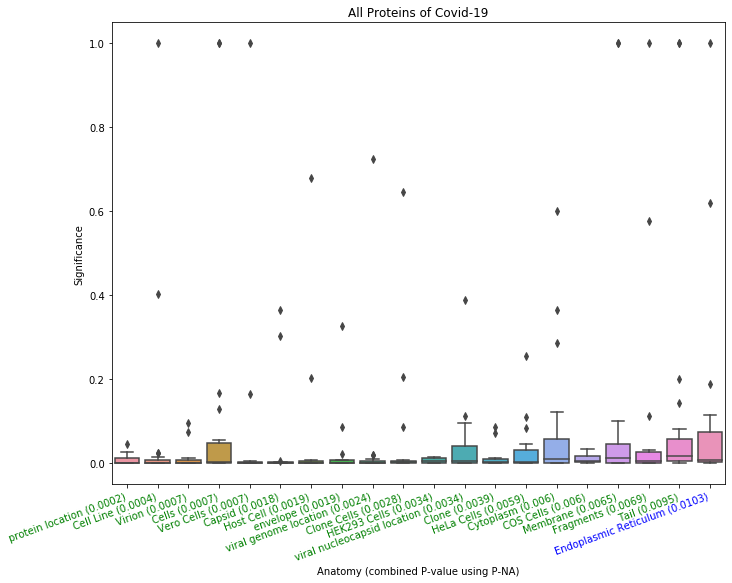

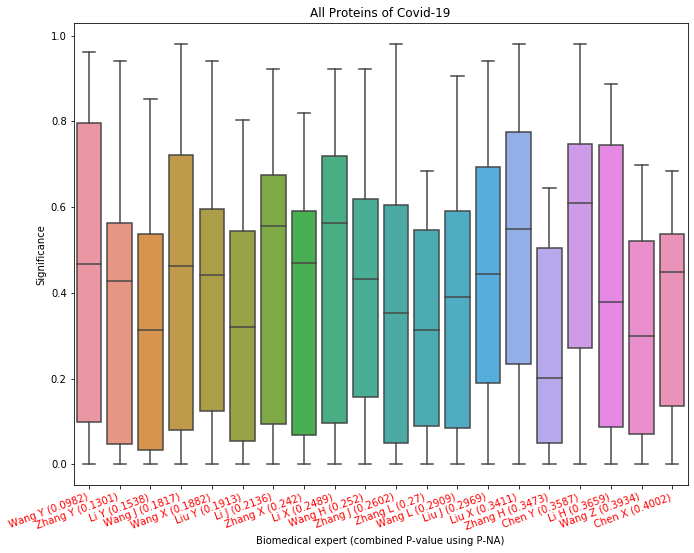

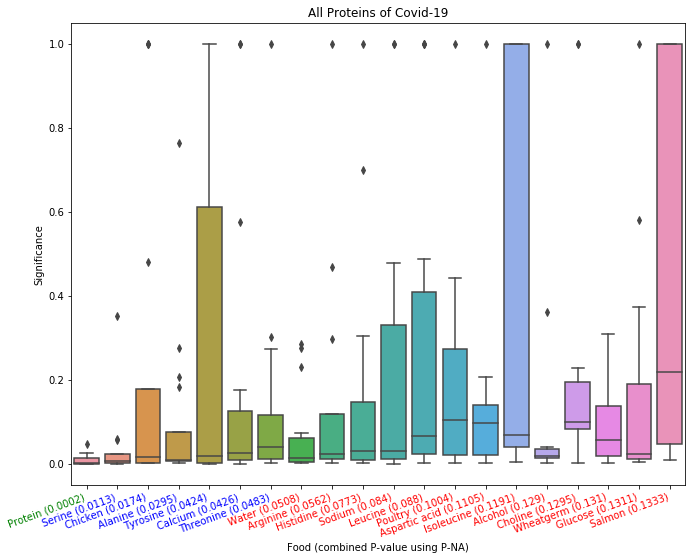

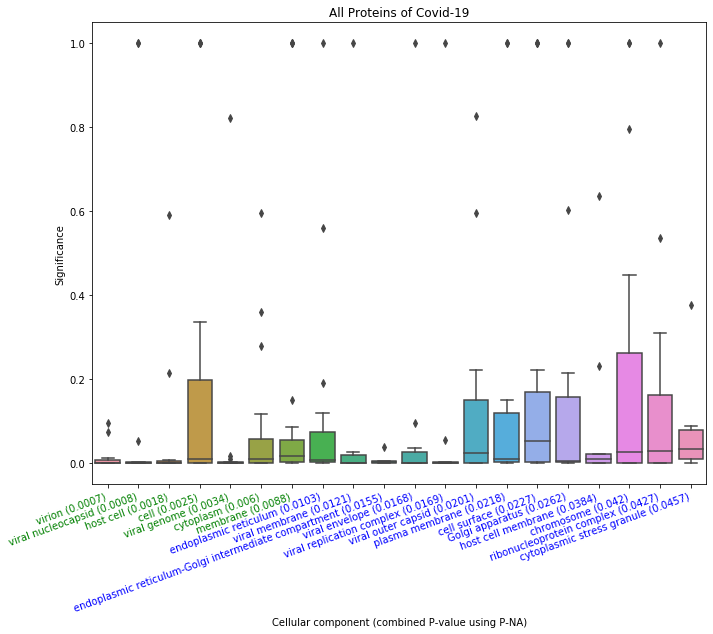

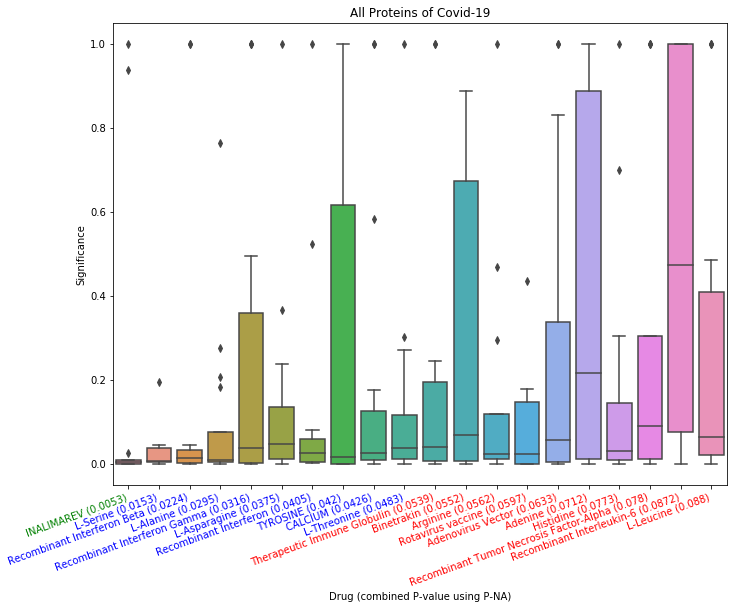

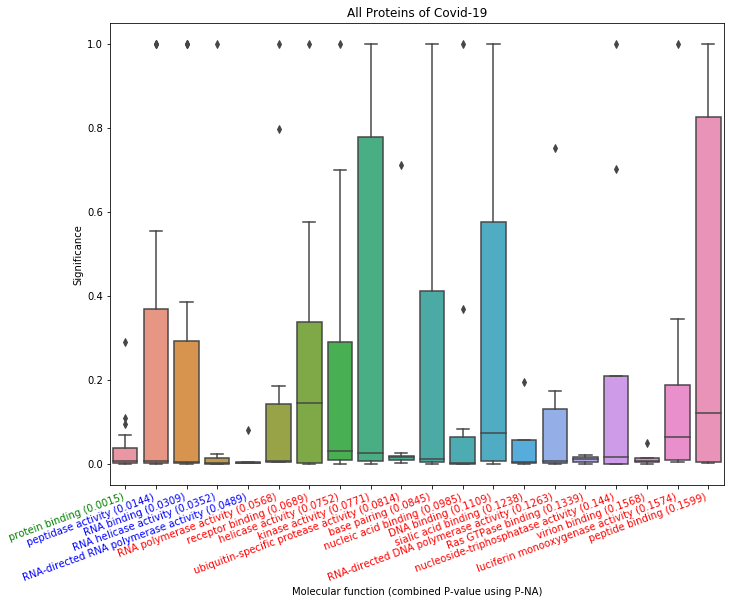

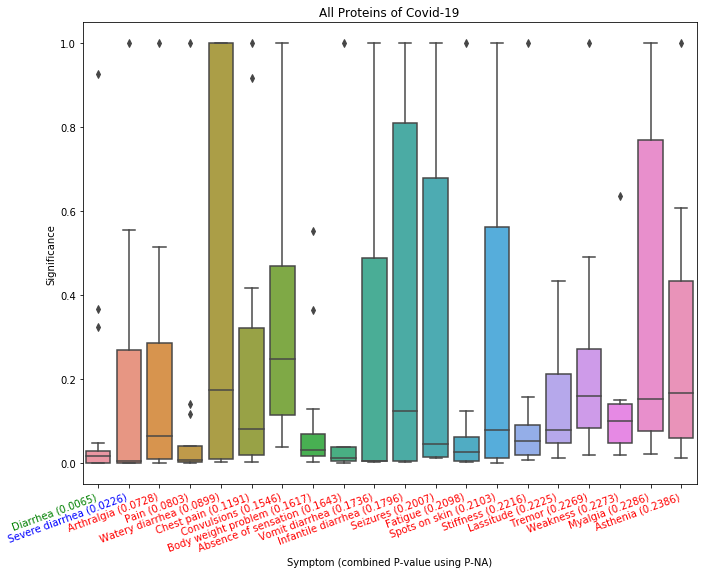

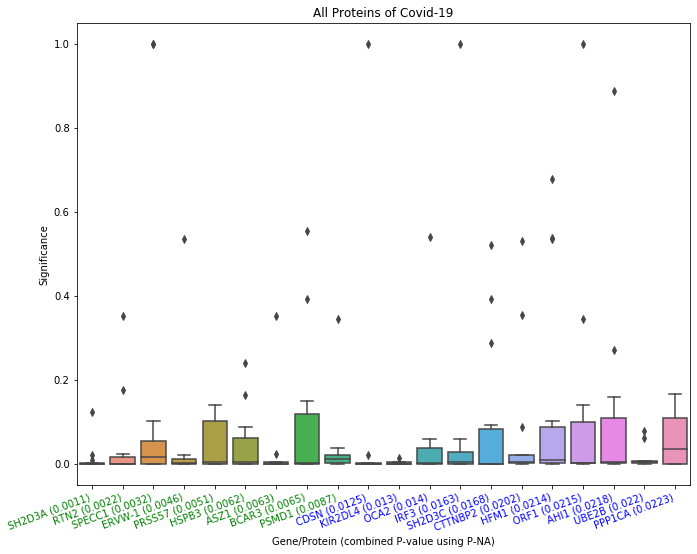

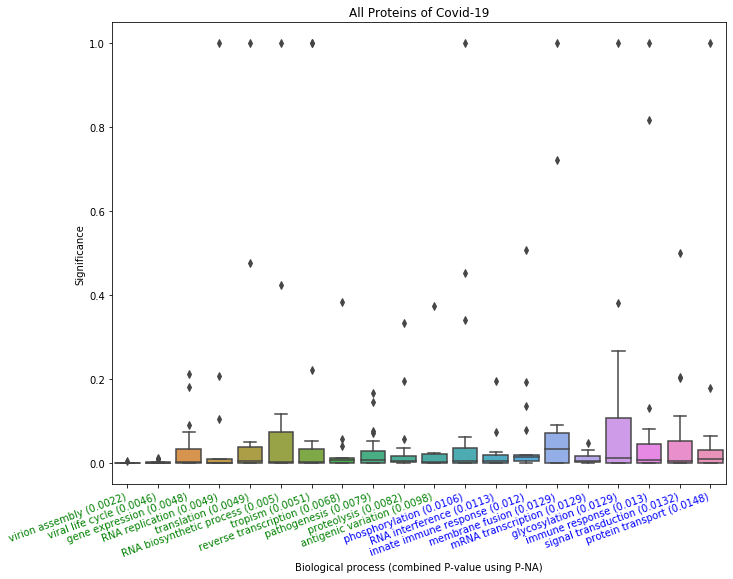

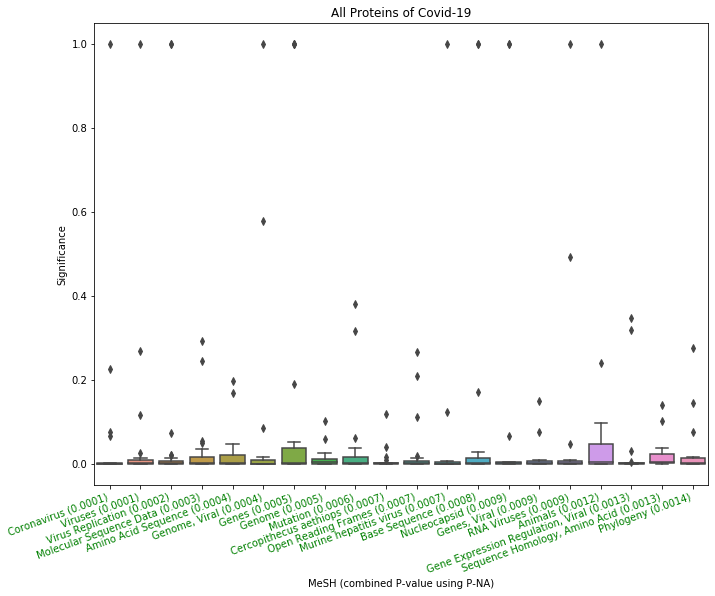

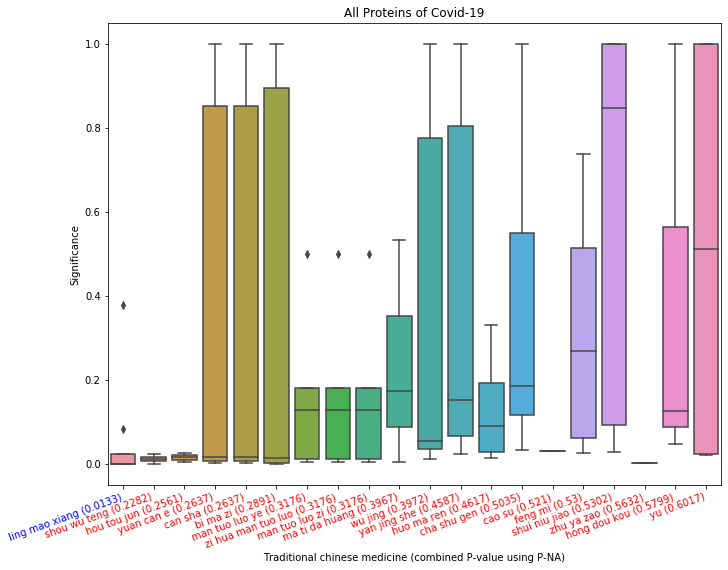

In [17]:
# epsilon = 2.22045e-16
# All_Df['Significance'][All_Df['Significance']<epsilon]=epsilon
# All_Df['Significance'][All_Df['Significance']>1-epsilon]=1-epsilon
finalLen=20
AssocNameTOPs = pd.DataFrame()
pdf = PdfPages(scriptName+'-final.pdf')

for Type in All_Df.AssociationType.unique():#[5:6]:
    AssocName = pd.DataFrame()
    AssocType = All_Df[All_Df['AssociationType']==Type]
    print(Type, ': ', len(AssocType))
    
    for Name in AssocType.AssociationName.unique():
        NameType_Df = AssocType[AssocType['AssociationName']==Name] # all columns with special AssociationName and AssociationType!

        ##########  weighrtedMean Z-transform #############
        w = NameType_Df['proteinLength']   # weights: protein lengths
#         Ps = 1-NameType_Df['Significance']   # Probabilities: 1-p_values
#         Z = norm.ppf(Ps)   # transform probabilities to Z
        Sig = NameType_Df['Significance']
        wS = np.sum(w*np.log(Sig))   # weighted Geometric Sum
        W = lenAllProteins   # length of All considered proteins in the Covid-19
#         P = norm.cdf(wZ/W)    # inverse Z-terans of weighted mean
        p_value = np.exp(wS/W)   # final p_value
        weightedSig = p_value   
        
        ##########  weighrted Significance #############
#         weightedSig = 1 - (sum(NameType_Df['proteinLength'] * (1-NameType_Df['Significance']))/lenAllProteins)
#         weightedSig = 1 - (sum((1-NameType_Df['Significance']))/len(lenOfProteins_Df))
        #print(Name, Type, weightedSig)
        ########################################

        count = np.count_nonzero(NameType_Df['Significance'])
        minSig = np.min(NameType_Df['Significance'])
        meanSig = np.mean(NameType_Df['Significance'])
        medSig = np.median(NameType_Df['Significance'])
        std = np.std(NameType_Df['Significance'])
        
        tmpData = [[Type, Name, count, weightedSig, minSig, meanSig, medSig, std] ]
        AssocName = AssocName.append(pd.DataFrame(tmpData
                                                  , columns = ['AssociationType', 'AssociationName', '#of proteins',
                                                               'weighted_Sig', 'min_Sig', 'mean_Sig', 'median_Sig', 'std_Significance'])
                                     , ignore_index=True) 

    if len(AssocName)==0:
        continue
    AssocName = AssocName.sort_values(by=['weighted_Sig', '#of proteins', ], ascending=[True,False, ])
    AssocName = AssocName[:finalLen]
#     AssocName = AssocName.sort_values(by=['#of proteins', 'minSignificance', ], ascending=[ False,True,])
#     AssocName = AssocName[:20]
    AssocNameTOPs = AssocNameTOPs.append(AssocName)
    
    

    #**************************
    plt.figure(figsize=(11,8.5))

    
    search_values = AssocName.AssociationName.values
    AssocType_Tops = AssocType[AssocType['AssociationName'].isin(search_values)]

    ax = sns.boxplot(x="AssociationName", 
                     y="Significance", 
                     data= AssocType_Tops,
                     order = search_values#AssocType_Tops['AssociationName'].value_counts().index
                    )
    ax.set_xticklabels(AssocName["AssociationName"] + " ("+ AssocName["weighted_Sig"].round(4).astype(str)+")",
                       #ax.get_xticklabels(), 
                       horizontalalignment='right',
                       rotation=20)
    colors = np.repeat('r',finalLen)
    colors[AssocName["weighted_Sig"]<0.05]='b'
    colors[AssocName["weighted_Sig"]<0.01]='g'
    for xtick, color in zip(ax.get_xticklabels(), colors):
        xtick.set_color(color)

    ax.set_title('All Proteins of Covid-19')
    ax.set_xlabel(Type + ' (combined P-value using P-NA)')
    pdf.savefig(ax.figure, bbox_inches='tight')
    
pdf.close()
AssocNameTOPs.to_csv(scriptName+'-TOPs.txt', sep='\t', index=None)

# AssocNameTOPs

In [18]:
# pdf.close()